In [2]:
import networkx as nx
import pandas as pd
import os
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import islice
import time
from all_forms import all_formulations

In [2]:
# read demands
demand = open('Sprint/demand.txt', 'r')
lines = demand.readlines()
demands = []

for line in lines:
    demands.append(line.split())

demands = np.array(demands, dtype = float)
demands = np.max(demands, axis=0) #use the maximum demand over all times (rows) for each node-node pair

#demand = [float(i) for i in line.split()]
# n = int(len(demands)**0.5)
# demand = np.array(demands).reshape(n, n)

# np.fill_diagonal(demand, 0) #demand from a node to itself should be 0

In [3]:
def createGraph(n):
  edges = []
  cap = 1000000000
  for i in range(n-1):
      edges.append((int(i), int(i+1), int(cap)))
  edges.append((int(0), int(n-1), int(cap)))
  for i in range(n):
    for j in range(2):
      node = (i + random.randint(1, n-1)) % n
      tail = min(i, node)
      head = max(i, node)
      if (int(tail), int(head), int(cap)) not in edges:
          edges.append((int(tail), int(head), int(cap)))

  # generate graph
  G = nx.Graph()
  G.add_weighted_edges_from(edges)

  return G

In [4]:
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )

In [5]:
def getDemand(n):
  newDemand = demands[np.random.choice(range(len(demands)), n**2)]
  newDemand = np.array(newDemand).reshape(n, n)
  np.fill_diagonal(newDemand, 0)
  return newDemand

In [6]:
res = {'maxThroughput' : [], 'minMLUObj' : [], 'minMLUConstraint': []}

In [7]:
G5 = createGraph(5)
demand5 = getDemand(5)
runtime5_maxThroughput, runtime5_minMLUObj, runtime5_minMLUConstraint = all_formulations(G5, demand5, 5)

res['maxThroughput'].append(runtime5_maxThroughput)
res['minMLUObj'].append(runtime5_minMLUObj)
res['minMLUConstraint'].append(runtime5_minMLUConstraint)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-17
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 34 rows, 95 columns and 322 nonzeros
Model fingerprint: 0x580c10a5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+03, 1e+09]
Presolve removed 34 rows and 95 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.1618861e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.161886144e+06
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruc

In [8]:
G10 = createGraph(10)
demand10 = getDemand(10)
runtime10_maxThroughput, runtime10_minMLUObj, runtime10_minMLUConstraint = all_formulations(G10, demand10, 10)

res['maxThroughput'].append(runtime10_maxThroughput)
res['minMLUObj'].append(runtime10_minMLUObj)
res['minMLUConstraint'].append(runtime10_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 136 rows, 473 columns and 1586 nonzeros
Model fingerprint: 0x9111ecae
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 136 rows and 473 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0439907e+07   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.04 seconds (0.00 work units)
Optimal objective  2.043990749e+07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using u

In [9]:
G25 = createGraph(25)
demand25 = getDemand(25)
runtime25_maxThroughput, runtime25_minMLUObj, runtime25_minMLUConstraint = all_formulations(G25, demand25, 25)

res['maxThroughput'].append(runtime25_maxThroughput)
res['minMLUObj'].append(runtime25_minMLUObj)
res['minMLUConstraint'].append(runtime25_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 736 rows, 3068 columns and 11490 nonzeros
Model fingerprint: 0x2ed26eed
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 736 rows and 3068 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4770304e+08   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.477030447e+08
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, usin

In [10]:
G50 = createGraph(50)
demand50 = getDemand(50)
runtime50_maxThroughput, runtime50_minMLUObj, runtime50_minMLUConstraint = all_formulations(G50, demand50, 50)


res['maxThroughput'].append(runtime50_maxThroughput)
res['minMLUObj'].append(runtime50_minMLUObj)
res['minMLUConstraint'].append(runtime50_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2734 rows, 12392 columns and 51704 nonzeros
Model fingerprint: 0xf5519d74
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 2734 rows and 12392 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7414547e+08   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.02 work units)
Optimal objective  5.741454697e+08
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, 

In [11]:
G100 = createGraph(100)
demand100 = getDemand(100)
runtime100_maxThroughput, runtime100_minMLUObj, runtime100_minMLUConstraint = all_formulations(G100, demand100, 100)


res['maxThroughput'].append(runtime100_maxThroughput)
res['minMLUObj'].append(runtime100_minMLUObj)
res['minMLUConstraint'].append(runtime100_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10480 rows, 49790 columns and 227086 nonzeros
Model fingerprint: 0xeef2cd4d
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 10480 rows and 49790 columns
Presolve time: 0.06s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2476388e+09   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.08 seconds (0.07 work units)
Optimal objective  2.247638752e+09
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processor

In [13]:
G200 = createGraph(200)
demand200 = getDemand(200)
runtime200_maxThroughput, runtime200_minMLUObj, runtime200_minMLUConstraint = all_formulations(G200, demand200, 200)


res['maxThroughput'].append(runtime200_maxThroughput)
res['minMLUObj'].append(runtime200_minMLUObj)
res['minMLUConstraint'].append(runtime200_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 40982 rows, 199591 columns and 986346 nonzeros
Model fingerprint: 0x2b1bb97a
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 40982 rows and 199591 columns
Presolve time: 1.18s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.3101816e+09   0.000000e+00   0.000000e+00      1s

Solved in 0 iterations and 1.33 seconds (0.32 work units)
Optimal objective  9.310181571e+09
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical process

In [14]:
G300 = createGraph(300)
demand300 = getDemand(300)
runtime300_maxThroughput, runtime300_minMLUObj, runtime300_minMLUConstraint = all_formulations(G300, demand300, 300)


res['maxThroughput'].append(runtime300_maxThroughput)
res['minMLUObj'].append(runtime300_minMLUObj)
res['minMLUConstraint'].append(runtime300_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 91488 rows, 449394 columns and 2331684 nonzeros
Model fingerprint: 0x9e592f51
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 91488 rows and 449394 columns
Presolve time: 3.30s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1041263e+10   0.000000e+00   0.000000e+00      4s

Solved in 0 iterations and 3.54 seconds (0.79 work units)
Optimal objective  2.104126314e+10
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical proces

In [15]:
G400 = createGraph(400)
demand400 = getDemand(400)
runtime400_maxThroughput, runtime400_minMLUObj, runtime400_minMLUConstraint = all_formulations(G400, demand400, 400)


res['maxThroughput'].append(runtime400_maxThroughput)
res['minMLUObj'].append(runtime400_minMLUObj)
res['minMLUConstraint'].append(runtime400_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 161996 rows, 799198 columns and 4277402 nonzeros
Model fingerprint: 0xa2349646
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 2365 rows and 537346 columns (presolve time = 5s) ...
Presolve removed 154915 rows and 784149 columns
Presolve time: 6.96s
Presolved: 7081 rows, 15049 columns, 19581 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.7552224e+10   0.000000e+00   0.000000e+00      7s

Use crossover to convert LP symmetric solution to basic solution...
Crossover log...

    2729 DPushes remaining with DInf 0.0000000e+00                 7s
       0 DPushes remaining with DInf 0.00

In [16]:
pd.DataFrame(res).to_csv('time_results.csv')

In [6]:
times_df

,Unnamed: 0,maxThroughput,minMLUObj,minMLUConstraint
0,0,0.029,0.020,0.021
1,1,0.043,0.027,0.025
2,2,0.024,0.031,0.031
3,3,0.033,0.068,0.079
4,4,0.085,0.202,0.291
5,5,1.333,1.946,1.833
6,6,3.545,3.623,5.225
7,7,7.506,5.169,9.513


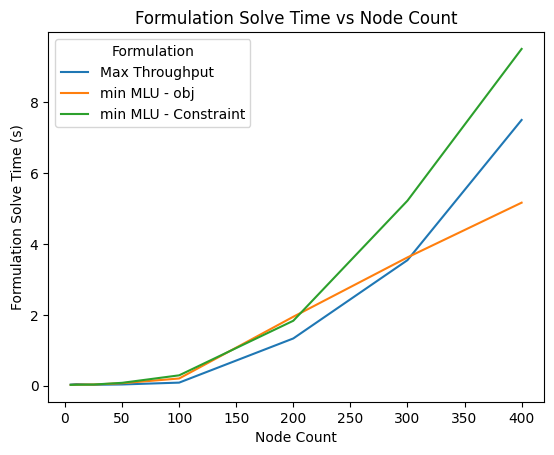

In [11]:
nodes_cnt = [5, 10, 25, 50, 100, 200, 300, 400]
formulation = ['Max Throughput', 'min MLU - obj', 'min MLU - Constraint']
times_df = pd.read_csv('time_results.csv').drop(['Unnamed: 0'], axis=1)

for i, col in enumerate(times_df.columns):
    plt.plot(nodes_cnt, times_df[col], label = formulation[i])

plt.title('Formulation Solve Time vs Node Count')
plt.legend(title = 'Formulation')
plt.xlabel('Node Count')
plt.ylabel('Formulation Solve Time (s)')
plt.show()
